<a href="https://colab.research.google.com/github/NikhilJ2712/Data-Science/blob/main/Case__Study_Cement_Strenght_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Data Manipulation Library
import pandas as pd
import numpy as np

# Importing Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt

# Import FilterWarnings Library
import warnings
warnings.filterwarnings('ignore')

# Import Logging
import logging
logging.basicConfig(level = logging.INFO,
                    filename ='model.log',
                    format = '%(asctime)s) - %(levelname)s - %(message)s',
                    filemode = 'w')
logging.info('Model Started')


In [ ]:
#  Importing Data using Pandas Function
df = pd.read_csv('/content/Concrete_Data.csv')

# It will print Shuffle 100% Dataset
df.sample(frac = 1)

# df.head() # it will print top five rows
# df.tail() # it will print bottom five rows

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
656,200.0,133.0,0.0,192.0,0.0,965.4,806.2,3,11.41
427,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,14,19.42
824,302.0,0.0,0.0,203.0,0.0,974.0,817.0,28,21.75
889,262.0,111.0,86.0,195.0,5.0,895.0,733.0,28,33.72
879,313.0,145.0,0.0,178.0,8.0,867.0,824.0,28,44.39
...,...,...,...,...,...,...,...,...,...
340,297.2,0.0,117.5,174.8,9.5,1022.8,753.5,14,36.99
383,451.0,0.0,0.0,165.0,11.3,1030.0,745.0,28,78.80
556,193.5,290.2,0.0,185.7,0.0,998.2,704.3,28,32.63
574,135.7,203.5,0.0,185.7,0.0,1076.2,759.3,7,7.51


In [ ]:
# Checking the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

<Axes: >

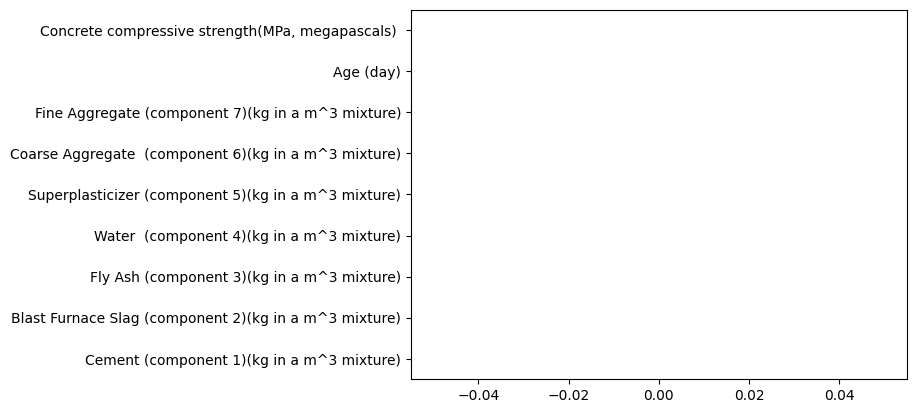

In [ ]:
# Checking Null Values
df.isnull().sum().plot(kind = 'barh')

In [ ]:
# Dataset Split into Numerical & Categorical
numerical_col = df.select_dtypes(exclude='object')
numerical_col

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
cetegorical_col = df.select_dtypes(include='object')
cetegorical_col

""
0
1
2
3
4
...
1025
1026
1027
1028


In [ ]:

# EDA : Univariate Analysis - Evaluating Descriptive Stats

# from collections import OrderedDict
# stats = []

# for i in numerical_col:
#     numerical_stats = OrderedDict({
#         'Feature': i,
#         'Count': df[i].count(),
#         'Mean': df[i].mean(),
#         'Median': df[i].median(),
#         'Minimum': df[i].min(),
#         'Maximum': df[i].max(),
#         'Range': df[i].max() - df[i].min(),
#         'Standard Deviation': df[i].std(),
#         'Skewness': df[i].skew(),
#         'Kurtosis': df[i].kurt(),
#         'Q1': df[i].quantile(0.25),
#         'Q3': df[i].quantile(0.75),
#         'IQR': df[i].quantile(0.75) - df[i].quantile(0.25),
#     })
#     stats.append(numerical_stats)

# # Convert to DataFrame
# report = pd.DataFrame(stats)
# report

#  EDA : Univariate Analysis - Evaluating Descriptive Stats

def univariate_stats():
  from collections import OrderedDict

  stats = []

  for i in numerical_col:
    numerical_stats = OrderedDict({
        'Feature': i,
        'Count': df[i].count(),
        'Minimum': df[i].min(),
        'Maximum': df[i].max(),
        'Range': df[i].max() - df[i].min(),
        'Mean': df[i].mean(),
        'Median': df[i].median(),
        'Q1': df[i].quantile(0.25),
        'Q3': df[i].quantile(0.75),
        'IQR': df[i].quantile(0.75) - df[i].quantile(0.25),
        'Standard Deviation': df[i].std(),
        'Skewness': df[i].skew(),
        'Kurtosis': df[i].kurtosis(),
        'Variance': df[i].var()



    })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)

  return report

ans = univariate_stats()
ans

,Feature,Count,Minimum,Maximum,Range,Mean,Median,Q1,Q3,IQR,Standard Deviation,Skewness,Kurtosis,Variance
0,Cement (component 1)(kg in a m^3 mixture),1030,102.00,540.0,438.00,281.167864,272.900,192.375,350.000,157.625,104.506364,0.509481,-0.520652,10921.580220
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,1030,0.00,359.4,359.40,73.895825,22.000,0.000,142.950,142.950,86.279342,0.800717,-0.508175,7444.124812
2,Fly Ash (component 3)(kg in a m^3 mixture),1030,0.00,200.1,200.10,54.188350,0.000,0.000,118.300,118.300,63.997004,0.537354,-1.328746,4095.616541
3,Water (component 4)(kg in a m^3 mixture),1030,121.80,247.0,125.20,181.567282,185.000,164.900,192.000,27.100,21.354219,0.074628,0.122082,456.002651
4,Superplasticizer (component 5)(kg in a m^3 mix...,1030,0.00,32.2,32.20,6.204660,6.400,0.000,10.200,10.200,5.973841,0.907203,1.411269,35.686781
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,1030,801.00,1145.0,344.00,972.918932,968.000,932.000,1029.400,97.400,77.753954,-0.040220,-0.599016,6045.677357
6,Fine Aggregate (component 7)(kg in a m^3 mixture),1030,594.00,992.6,398.60,773.580485,779.500,730.950,824.000,93.050,80.175980,-0.253010,-0.102177,6428.187792
7,Age (day),1030,1.00,365.0,364.00,45.662136,28.000,7.000,56.000,49.000,63.169912,3.269177,12.168989,3990.437729
8,"Concrete compressive strength(MPa, megapascals)",1030,2.33,82.6,80.27,35.817961,34.445,23.710,46.135,22.425,16.705742,0.416977,-0.313725,279.081814


In [ ]:
df.columns #To display column names

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

<Axes: >

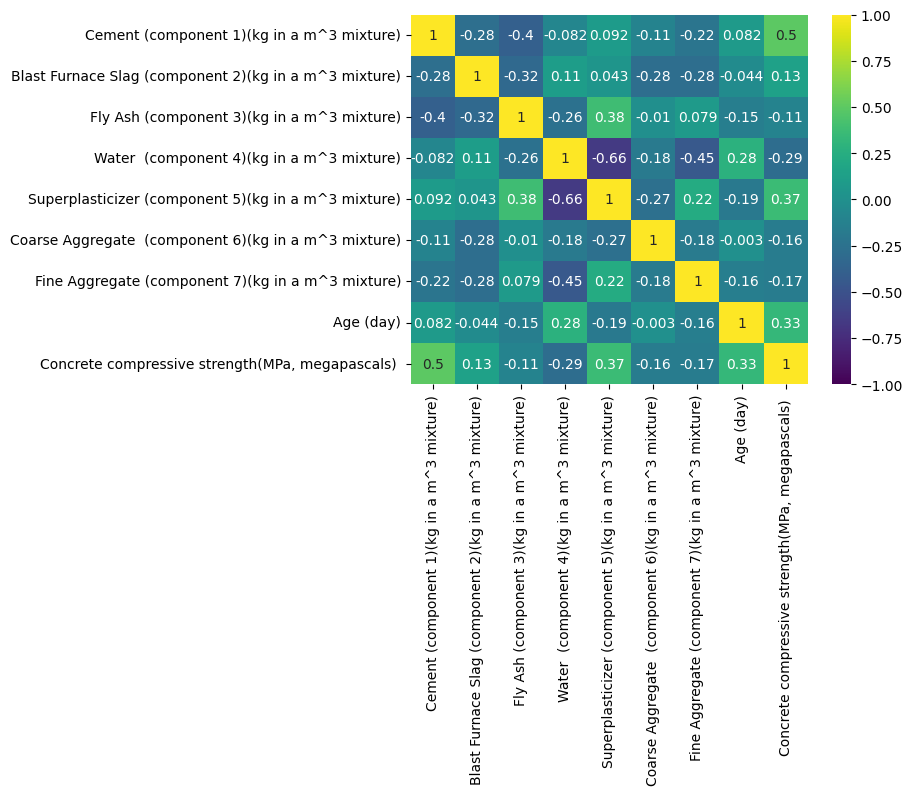

In [41]:
sns.heatmap(df.corr(),annot = True, vmax = 1, vmin = -1, center = 0, cmap = 'viridis')

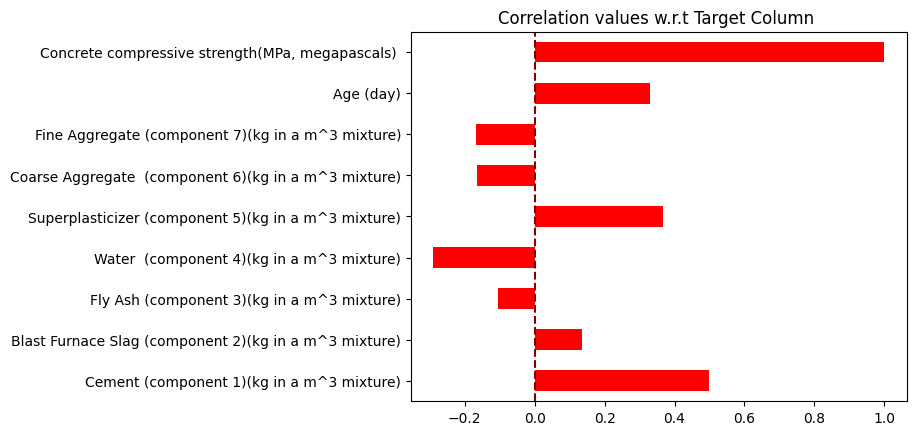

In [45]:
df.corr() ['Concrete compressive strength(MPa, megapascals) '].plot(kind = 'barh',color = 'red')
plt.axvline(0,linestyle = '--',color = 'maroon')
plt.title('Correlation values w.r.t Target Column ')
plt.show()

In [ ]:
#Step 1:- Split the Data into X and y

from sklearn.model_selection import train_test_split
X = df.drop('Concrete compressive strength(MPa, megapascals) ', axis = 1)
y = df['Concrete compressive strength(MPa, megapascals) ']

In [ ]:
# Step 2 : Use Train Test Split:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42) # Any Random value like 1,2,3,4...42 any value.

In [ ]:
# Step 3 : Using Scaling Technique:
'''
Note:
1. Always 'fit_transform' on Training Data Where as use 'tranform' on Test Data

# Seen Data
X_train = scalar.fit_transform(X_train)

# Unseen Data
X_test = scalar.transform(X_test)

'''
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
# Seen Data
X_train = scalar.fit_transform(X_train)

# Unseen Data
X_test = scalar.transform(X_test)

# Checking
print(X_test.max(), X_test.min())


1.0261538461538462 0.0


In [ ]:
# Model Building
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train,y_train)

y_pred_LR = LR.predict(X_test)

from sklearn.metrics import r2_score
print(f'The Model Accuracy for Linear Regression is',r2_score(y_test,y_pred_LR))

The Model Accuracy for Linear Regression is 0.5943782479239215


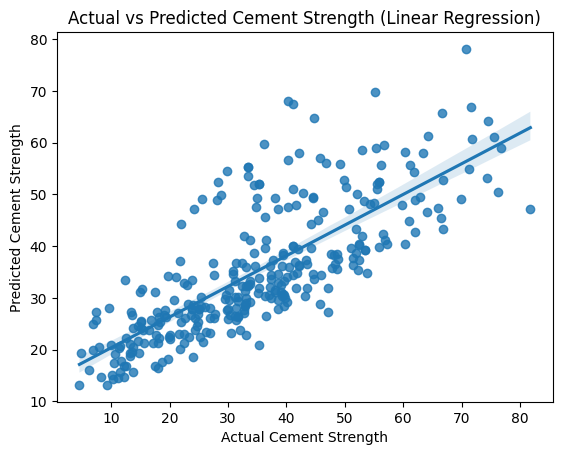

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot actual vs predicted

sns.regplot(x=y_test, y=y_pred_LR)
plt.xlabel('Actual Cement Strength')
plt.ylabel('Predicted Cement Strength')
plt.title('Actual vs Predicted Cement Strength (Linear Regression)')

plt.show()


# import seaborn as sns
# import matplotlib.pyplot as plt

# # Plot actual vs predicted
# sns.set(style='whitegrid')
# sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
# plt.xlabel('Actual Cement Strength')
# plt.ylabel('Predicted Cement Strength')
# plt.title('Actual vs Predicted Cement Strength (Linear Regression)')
# plt.grid(True)
# plt.show()

In [ ]:
LR.intercept_  # Y-intercept of the Linear Regression line.- the constant term in the linear regression equation

np.float64(-13.616932642237444)

In [ ]:
LR.coef_ # Feature coefficients (slopes) — indicate the impact of each input variable on the target.- Weights — the learned slopes for each feature in the linear regression model

array([ 54.95342731,  41.97459796,  17.55268553, -11.34057972,
        12.76701497,   9.66978699,  14.4992847 ,  41.47485093])

In [ ]:
X.columns # Feature names — column names of the input (independent) variables.

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)'],
      dtype='object')

In [ ]:
# Ridge and Lasso

from sklearn.linear_model import Ridge, Lasso

Ridge = Ridge().fit(X_train,y_train)
y_pred_Ridge = Ridge.predict(X_test)


print(f'The Model Accuracy for Ridge Regression is',r2_score(y_test,y_pred_Ridge))

The Model Accuracy for Ridge Regression is 0.595277347313935


In [ ]:
Lasso = Lasso().fit(X_train,y_train)
y_pred_Lasso = Lasso.predict(X_test)
print(f'The Model Accuracy for Lasso Regression is',r2_score(y_test,y_pred_Ridge))

The Model Accuracy for Lasso Regression is 0.595277347313935


In [ ]:
# Using Tree Based Algorithm

from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor().fit(X_train,y_train)
y_pred_DT = DT.predict(X_test)
print(f'The Model Accuracy for Decision Tree Regression is',r2_score(y_test,y_pred_DT))

The Model Accuracy for Decision Tree Regression is 0.8216285174984448


In [ ]:
# Using Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor().fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)
print(f'The Model Accuracy for Random Forest Regression is',r2_score(y_test,y_pred_RF))

The Model Accuracy for Random Forest Regression is 0.8836830243705168


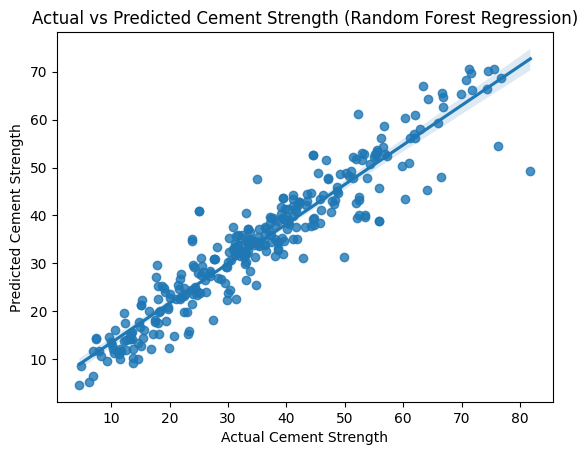

In [ ]:
sns.regplot(x=y_test, y=y_pred_RF)
plt.xlabel('Actual Cement Strength')
plt.ylabel('Predicted Cement Strength')
plt.title('Actual vs Predicted Cement Strength (Random Forest Regression)')

plt.show()

In [ ]:
# Boosting Algorithm GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor().fit(X_train,y_train)
y_pred_GB = GB.predict(X_test)
print(f'The Model Accuracy for Gradient Boosting Regression is',r2_score(y_test,y_pred_GB))

The Model Accuracy for Gradient Boosting Regression is 0.8910720936831832


In [ ]:
# AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor

ADA = AdaBoostRegressor(random_state=42)
ADA.fit(X_train, y_train)
y_pred_ADA = ADA.predict(X_test)

print(f'The Model Accuracy for AdaBoost Regression is',r2_score(y_test,y_pred_ADA))

The Model Accuracy for AdaBoost Regression is 0.7760724424075538


In [ ]:
# XGBoost Regressor

from xgboost import XGBRegressor

XGB = XGBRegressor(random_state=42, objective='reg:squarederror')
XGB.fit(X_train, y_train)
y_pred_XGB = XGB.predict(X_test)

print(f'The Model Accuracy for XGBoost Regression is',r2_score(y_test,y_pred_XGB))


The Model Accuracy for XGBoost Regression is 0.9104444067517969


In [ ]:
# LightGBM Regressor
from lightgbm import LGBMRegressor

LGB = LGBMRegressor(random_state=42)
LGB.fit(X_train, y_train)
y_pred_LGB = LGB.predict(X_test)

print(f'The Model Accuracy for LightGBM Regression is',r2_score(y_test,y_pred_LGB))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 841
[LightGBM] [Info] Number of data points in the train set: 721, number of used features: 8
[LightGBM] [Info] Start training from score 36.152732
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [35]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.4 MB/s eta 0:00:00


In [39]:
# CatBoost Regressor
from catboost import CatBoostRegressor

CAT = CatBoostRegressor(verbose=0, random_state=42)
CAT.fit(X_train, y_train)
y_pred_CAT = CAT.predict(X_test)


print(f'The Model Accuracy for CatBoost Regression is',r2_score(y_test,y_pred_CAT))

The Model Accuracy for CatBoost Regression is 0.9337297660671403


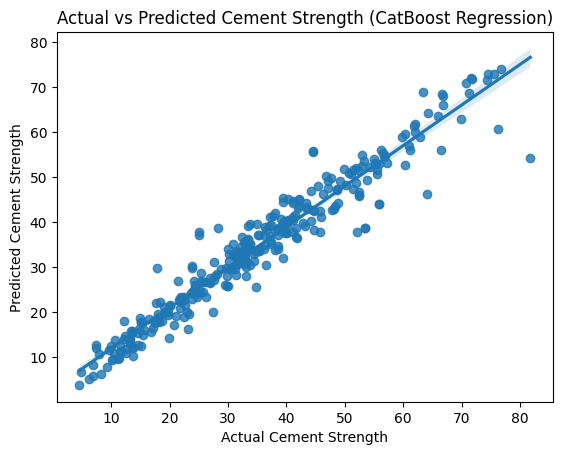

In [37]:
sns.regplot(x=y_test, y=y_pred_CAT)
plt.xlabel('Actual Cement Strength')
plt.ylabel('Predicted Cement Strength')
plt.title('Actual vs Predicted Cement Strength (CatBoost Regression)')

plt.show()